# EDA

In [1]:
import pandas as pd
Raw_path = "C:/Users/12506/Desktop/Memo/Raw data/default of credit card clients.xls"
Raw  = pd.read_excel(Raw_path, header=1)
Raw.columns = (Raw.columns.str.strip().str.replace(" ", "_"))
Target = "default_payment_next_month"

In [2]:
Raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
import matplotlib.pyplot as plt
def missing_report(df, name="df"):
    miss_cnt = df.isna().sum()
    miss_pct = (df.isna().mean()*100).round(3)
    out = pd.DataFrame({"missing_cnt": miss_cnt, "missing_pct": miss_pct})
    out = out[out["missing_cnt"] > 0].sort_values("missing_cnt", ascending=False)
    print(f"{name} missing cols:", out.shape[0])
    display(out.head(50))

def dup_report(df, name="df"):
    print(f"== {name} ==")
    print("dup_rows:", df.duplicated().sum())
    print("dup_ID  :", df["ID"].duplicated().sum())

def codebook_check_all(df, name="df", idcol="ID", show=20):
    print(f"== {name} codebook check ==")

    summary = []

    def report(col, bad_mask, rule_desc):
        n_bad = int(bad_mask.sum())
        summary.append((col, n_bad, rule_desc))
        print(f"{col}: bad={n_bad} | rule={rule_desc}")
        if n_bad > 0:
            display(df.loc[bad_mask, [idcol, col]].sort_values(idcol).head(show))

    # 1) y: {0,1}
    report("default_payment_next_month", (~df["default_payment_next_month"].isin([0, 1])) & df["default_payment_next_month"].notna(), "default_payment_next_month in {0,1}")

    # 2) SEX: {1,2}
    report("SEX", (~df["SEX"].isin([1, 2])) & df["SEX"].notna(), "SEX in {1,2}")

    # 3) EDUCATION: {1,2,3,4}
    report("EDUCATION", (~df["EDUCATION"].isin([1, 2, 3, 4])) & df["EDUCATION"].notna(), "EDUCATION in {1,2,3,4}")

    # 4) MARRIAGE: {1,2,3}
    report("MARRIAGE", (~df["MARRIAGE"].isin([1, 2, 3])) & df["MARRIAGE"].notna(), "MARRIAGE in {1,2,3}")

    # 5) AGE: 
    report("AGE", ((df["AGE"] < 0) | (df["AGE"] > 100)) & df["AGE"].notna(), "0 <= AGE <= 100")

    # 6) PAY_*：
    pay_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
    for c in pay_cols:
        report(c, ((df[c] < -2) | (df[c] > 9)) & df[c].notna(), "-2 <= PAY_* <= 9")

    # summary dataframe
    summary_df = pd.DataFrame(summary, columns=["col", "bad_cnt", "rule"])
    return summary_df

def hist1(df, col, bins=50, log1p=False, title=None, figsize=(6,4)):
    s = df[col].dropna()
    if log1p:
        s = np.log1p(s)
    plt.figure(figsize=figsize)
    plt.hist(s, bins=bins)
    plt.title(title or (f"{col}" + (" (log1p)" if log1p else "")))
    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
# plot setting
def plot(): 
    plt.style.use('seaborn-whitegrid')
    plt.rcParams['figure.figsize'] = (8, 5)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    

In [4]:
missing_report(Raw, "Raw")
dup_report(Raw, "Raw")
codebook_check_all(Raw, "Raw", idcol="ID", show=5)

Raw missing cols: 0


,missing_cnt,missing_pct


== Raw ==
dup_rows: 0
dup_ID  : 0
== Raw codebook check ==
default_payment_next_month: bad=0 | rule=default_payment_next_month in {0,1}
SEX: bad=0 | rule=SEX in {1,2}
EDUCATION: bad=345 | rule=EDUCATION in {1,2,3,4}


,ID,EDUCATION
47,48,5
69,70,5
385,386,5
502,503,6
504,505,6


MARRIAGE: bad=54 | rule=MARRIAGE in {1,2,3}


,ID,MARRIAGE
218,219,0
809,810,0
820,821,0
1019,1020,0
1443,1444,0


AGE: bad=0 | rule=0 <= AGE <= 100
PAY_0: bad=0 | rule=-2 <= PAY_* <= 9
PAY_2: bad=0 | rule=-2 <= PAY_* <= 9
PAY_3: bad=0 | rule=-2 <= PAY_* <= 9
PAY_4: bad=0 | rule=-2 <= PAY_* <= 9
PAY_5: bad=0 | rule=-2 <= PAY_* <= 9
PAY_6: bad=0 | rule=-2 <= PAY_* <= 9


,col,bad_cnt,rule
0,default_payment_next_month,0,"default_payment_next_month in {0,1}"
1,SEX,0,"SEX in {1,2}"
2,EDUCATION,345,"EDUCATION in {1,2,3,4}"
3,MARRIAGE,54,"MARRIAGE in {1,2,3}"
4,AGE,0,0 <= AGE <= 100
5,PAY_0,0,-2 <= PAY_* <= 9
6,PAY_2,0,-2 <= PAY_* <= 9
7,PAY_3,0,-2 <= PAY_* <= 9
8,PAY_4,0,-2 <= PAY_* <= 9
9,PAY_5,0,-2 <= PAY_* <= 9


In [ ]:
# Fix EDUCATION and MARRIAGE invalid values
Raw["EDUCATION"] = Raw["EDUCATION"].where(Raw["EDUCATION"].isin([1,2,3,4]),4)
Raw["MARRIAGE"] = Raw["MARRIAGE"].where(Raw["MARRIAGE"].isin([1,2,3]),3)
Raw["EDUCATION"].value_counts()
Raw["MARRIAGE"].value_counts()


MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [8]:
# Summary statistics with custom percentiles
Raw.describe(percentiles=[.01,.05,.95,.99]).T


,count,mean,std,min,1%,5%,50%,95%,99%,max
ID,30000.0,15000.500000,8660.398374,1.0,300.99,1500.95,15000.5,28500.05,29700.01,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,10000.00,20000.00,140000.0,430000.00,500000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,1.00,2.0,2.00,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,1.00,2.0,3.00,4.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,1.00,2.0,2.00,3.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,22.00,23.00,34.0,53.00,60.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-2.00,-2.00,0.0,2.00,3.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-2.00,-2.00,0.0,2.00,3.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-2.00,-2.00,0.0,2.00,3.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-2.00,-2.00,0.0,2.00,3.00,8.0


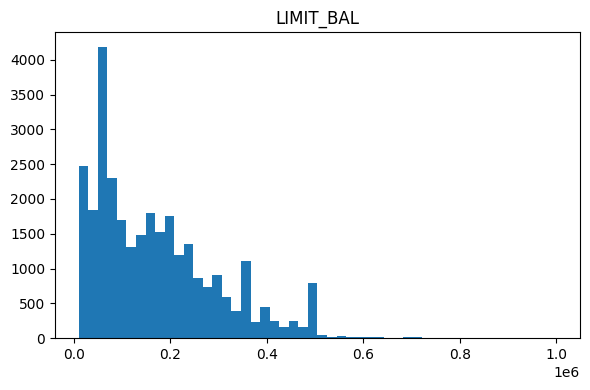

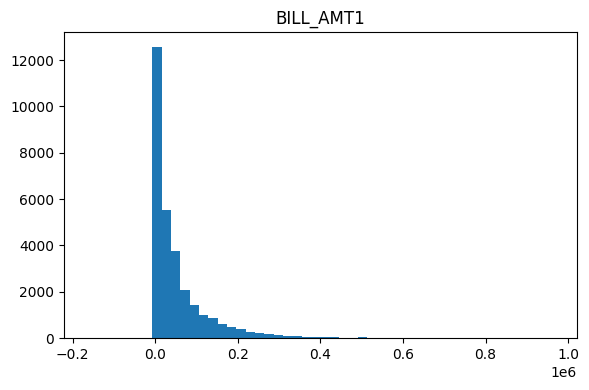

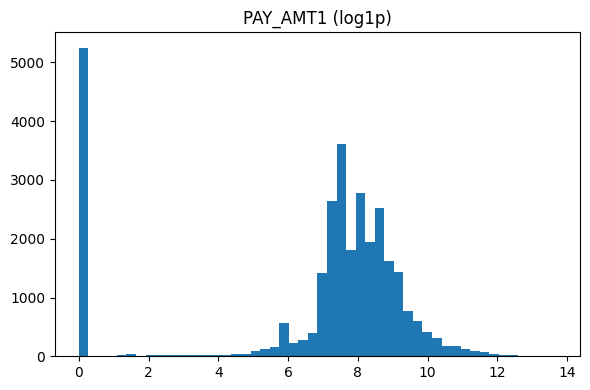

In [18]:
hist1(Raw, "LIMIT_BAL", log1p=False)
hist1(Raw, "BILL_AMT1")
hist1(Raw, "PAY_AMT1", log1p=True)

Split the data into Training set, Testing set and validation set 

In [ ]:
from sklearn.model_selection import train_test_split
Raw_X = Raw.drop(columns=[Target, "ID"])
Raw_y = Raw[Target]
X = Raw_X.copy()
y = Raw_y.copy()
X_train_m, X_test, y_train_m, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_m, y_train_m, test_size=0.25, random_state=42, stratify=y_train_m)
X_train.shape, X_val.shape, X_test.shape

((18000, 23), (6000, 23), (6000, 23))

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
#using AUC as metric for imbalanced classification
from tensorflow.keras.metrics import AUC
tf.keras.utils.set_random_seed(42)

Epoch 1/100
71/71 - 2s - loss: 0.5107 - AUC: 0.5885 - val_loss: 0.4731 - val_AUC: 0.6041 - 2s/epoch - 24ms/step
Epoch 2/100
71/71 - 0s - loss: 0.4591 - AUC: 0.6423 - val_loss: 0.4552 - val_AUC: 0.6508 - 304ms/epoch - 4ms/step
Epoch 3/100
71/71 - 0s - loss: 0.4534 - AUC: 0.6537 - val_loss: 0.4473 - val_AUC: 0.6647 - 324ms/epoch - 5ms/step
Epoch 4/100
71/71 - 0s - loss: 0.4450 - AUC: 0.6567 - val_loss: 0.4431 - val_AUC: 0.6713 - 314ms/epoch - 4ms/step
Epoch 5/100
71/71 - 0s - loss: 0.4384 - AUC: 0.6634 - val_loss: 0.4423 - val_AUC: 0.6599 - 303ms/epoch - 4ms/step
Epoch 6/100
71/71 - 0s - loss: 0.4358 - AUC: 0.6631 - val_loss: 0.4371 - val_AUC: 0.6558 - 305ms/epoch - 4ms/step
Epoch 7/100
71/71 - 0s - loss: 0.4335 - AUC: 0.6618 - val_loss: 0.4371 - val_AUC: 0.6629 - 313ms/epoch - 4ms/step
Epoch 8/100
71/71 - 0s - loss: 0.4316 - AUC: 0.6660 - val_loss: 0.4384 - val_AUC: 0.6586 - 307ms/epoch - 4ms/step
Epoch 9/100
71/71 - 0s - loss: 0.4297 - AUC: 0.6570 - val_loss: 0.4379 - val_AUC: 0.6533 -

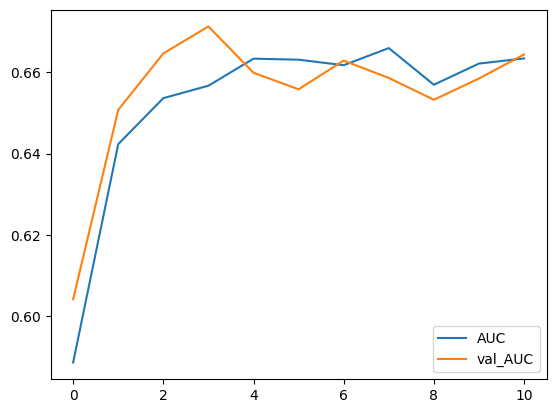

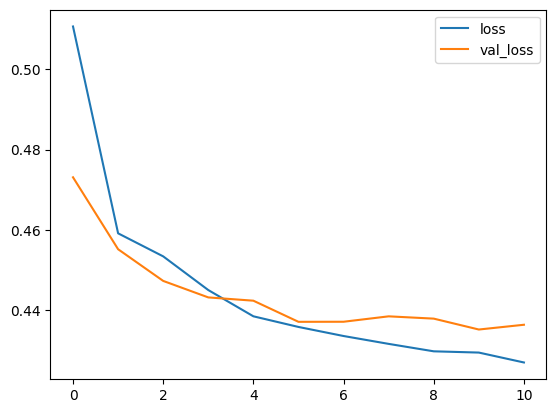

In [55]:
 
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),

    layers.Dense(1)
])
early_stopping = EarlyStopping(monitor='val_AUC', patience=10, restore_best_weights=True)

model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC')],)

history = model.fit(
    X_train,y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping],
    verbose=2
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['AUC', 'val_AUC']].plot()
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
print("validation AUC: {:0.4f}".format(history_df['val_AUC'].max()))

In [ ]:
#XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=3000,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=100,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

d:\python\Lib\site-packages\xgboost\callback.py:386: UserWarning: [01:32:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3000, n_jobs=None,
              num_parallel_tree=None, ...)

In [57]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [58]:
# NN evaluation on test set
from sklearn.metrics import roc_auc_score, log_loss
logits_test = model.predict(X_test).ravel()
proba_test = tf.nn.sigmoid(logits_test).numpy()

print("NN Test AUC:", roc_auc_score(y_test, proba_test))
print("NN Test LogLoss:", log_loss(y_test, proba_test))

# XGBoost evaluation on test set
xgb_proba_test = xgb_model.predict_proba(X_test)[:, 1]
print("XGBoost Test AUC:", roc_auc_score(y_test, xgb_proba_test))
print("XGBoost Test LogLoss:", log_loss(y_test, xgb_proba_test))

# random forest evaluation on test set
rf_proba_test = rf_model.predict_proba(X_test)[:, 1]
print("Random Forest Test AUC:", roc_auc_score(y_test, rf_proba_test))
print("Random Forest Test LogLoss:", log_loss(y_test, rf_proba_test))

188/188 [==============================] - 0s 1ms/step
NN Test AUC: 0.7054555575964216
NN Test LogLoss: 0.466734233757078
XGBoost Test AUC: 0.7805859665209445
XGBoost Test LogLoss: 0.4297508022735433
Random Forest Test AUC: 0.7755735259280212
Random Forest Test LogLoss: 0.43146186416158955
